# Cell 1 - Markdown
# Drivers & Pain Points Analysis
# This notebook identifies key satisfaction drivers and pain points for Ethiopian banking apps using VADER sentiment and theme clusters.


In [18]:
# Imports
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns


In [19]:
# Load CSV
df = pd.read_csv('../data/clean/reviews_with_sentiment_themes.csv')
df.head()



,review,rating,date,bank,source,sentiment,sentiment_score,theme_cluster
0,Make it user friendly.,2,2025-11-29,CBE,Google Play,Positive,0.4939,3
1,maaliif daddafee install gaafata,3,2025-11-28,CBE,Google Play,Neutral,0.0000,1
2,good app,5,2025-11-28,CBE,Google Play,Positive,0.4404,1
3,This application is very important and advanta...,5,2025-11-27,CBE,Google Play,Positive,0.5198,1
4,why didn't work this app?,1,2025-11-27,CBE,Google Play,Neutral,0.0000,0


In [20]:
def get_top_words(texts, n=10):
    words = ' '.join(texts).lower().split()
    stopwords = set([
        # English Stop Words (Standard)
        "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", 
        "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", 
        "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", 
        "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", 
        "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", 
        "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", 
        "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", 
        "against", "between", "into", "through", "during", "before", "after", "above", 
        "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", 
        "again", "further", "then", "once", "here", "there", "when", "where", "why", 
        "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", 
        "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", 
        "s", "t", "can", "will", "just", "don", "should", "now", "please", 
        # App-specific and common noise words (Expanded)
        "app", "mobile", "bank", "banking", "money", "get", "like", "use", "using",
        "one", "time", "it's", "i'm", "i've", "m", "d", "re", 
        # Subjective/Evaluative words (NEW ADDITION)
        "good", "great", "better", "best", "nice", "super", "bad", "worst", "ever", 
        # Generic Terms (NEW ADDITION)
        "cbe", "boa", "dashen",  # Bank names
        "update", "application", "problem", "work", "working", "even", "fix", "slow"
    ])
    words = [w.strip('.,!?-()') for w in words]
    words = [w for w in words if w not in stopwords and len(w) > 1 and w.isalpha()]
    
    counter = Counter(words)
    return counter.most_common(n)

In [21]:
# Extract drivers, pain points, suggestions
results = []
for bank in df['bank'].unique():
    bank_data = df[df['bank'] == bank]
    pos_reviews = bank_data[bank_data['sentiment']=='Positive']['review'].tolist()
    neg_reviews = bank_data[bank_data['sentiment']=='Negative']['review'].tolist()
    
    drivers = [w for w,_ in get_top_words(pos_reviews, 10)]
    pain_points = [w for w,_ in get_top_words(neg_reviews, 10)]
    suggestions = []
    if 'slow' in pain_points or 'loading' in pain_points:
        suggestions.append('Improve app speed / transfer times')
    if 'login' in pain_points:
        suggestions.append('Enhance login stability / authentication')
    if 'crash' in pain_points:
        suggestions.append('Fix app crashes / reliability issues')
    
    results.append({
        'bank': bank,
        'drivers': ', '.join(drivers[:5]),
        'pain_points': ', '.join(pain_points[:5]),
        'suggested_improvements': ', '.join(suggestions)
    })

summary_df = pd.DataFrame(results)
summary_df


,bank,drivers,pain_points,suggested_improvements
0,CBE,"easy, ethiopia, service, excellent, love","pin, branch, account, android, users",
1,BOA,"apps, make, ethiopia, need, phone","experience, times, always, user, poor",
2,Dashen,"easy, fast, features, amazing, experience","account, bill, apps, days, big",


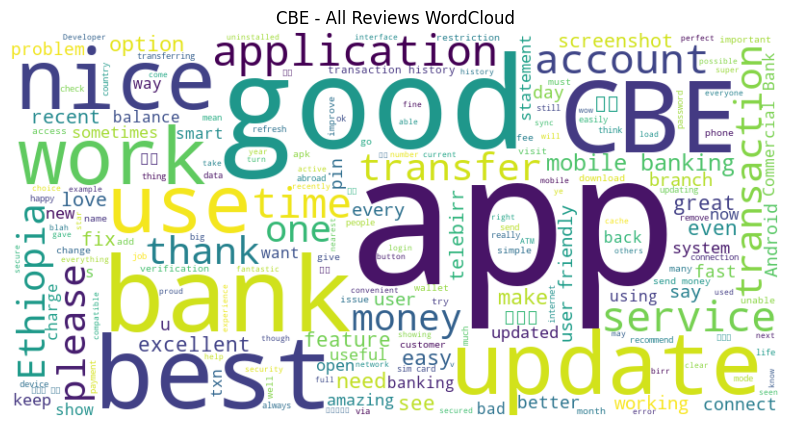

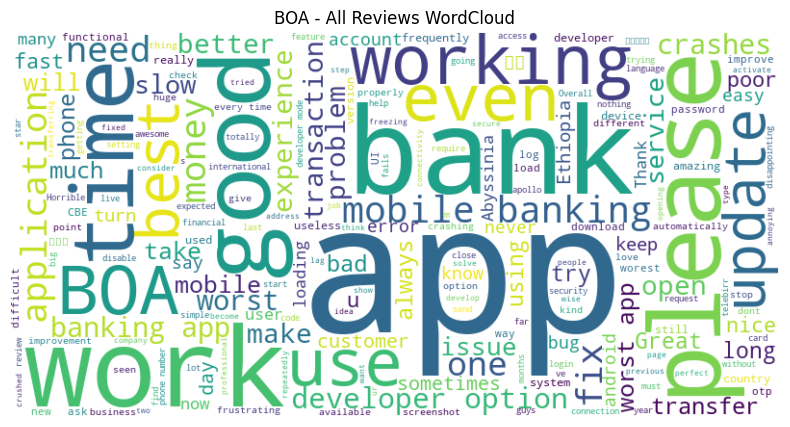

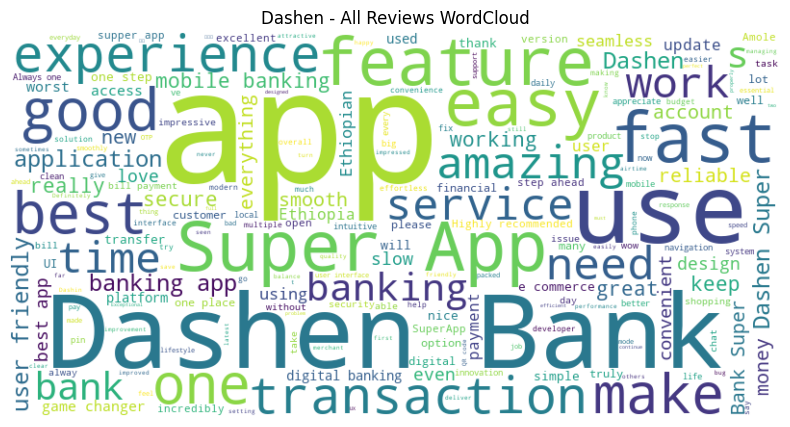

In [22]:
# Word Clouds
for bank in df['bank'].unique():
    text = df[df['bank']==bank]['review'].tolist()
    wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{bank} - All Reviews WordCloud')
    plt.show()


In [23]:
# Save CSV
summary_df.to_csv('../data/clean/drivers_painpoints_summary.csv', index=False)
print('Saved drivers & pain points summary to data/clean/drivers_painpoints_summary.csv')


Saved drivers & pain points summary to data/clean/drivers_painpoints_summary.csv
